In [ ]:
# Copyright (c) 2020-2021 CertifAI Sdn. Bhd.
# 
# This program is part of OSRFramework. You can redistribute it and/or modify
# it under the terms of the GNU Affero General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Affero General Public License for more details.
# 
# You should have received a copy of the GNU Affero General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

# Iris dataset Data Visualization using Principal Component Analysis(PCA)

## Introduction
In PCA, we are trying to reduce the dimensions of a dataset when the features become to vast for comprehension and cannot decide which feature to choose. PCA is preferrable when you want to visualize your data, or to help your machine learning model to improve.
>**Rule of thumb to choose PCA**: <br><br>
>1.Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?<br>
>2.Do you want to ensure your variables are independent of one another?<br>
>3.Are you comfortable making your independent variables less interpretable?<br><br>
>If yes to all, PCA is the right method. If no to question 3, PCA might not be your ideal solution.


In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data
Here we will load the IRIS dataset from **scikit-learn**. We will be utilizing `iris.data` and `iris.target` as usual for our features and values.

In [2]:
iris = datasets.load_iris()

As usual `dir(iris)` shows the attributes of the iris datasets.<br>
- `iris.data.shape` shows the shape of the data.<br>
- `iris.target_names` shows the classes that we want to classify.<br>
- `iris.feature_names` shows the name of features that we are training.

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.data.shape

(150, 4)

In [7]:
np.unique(iris.target)

array([0, 1, 2])

In [8]:
data = iris.data.astype(np.float32)
target = iris.target.astype(np.float32)

In [9]:
pd.DataFrame(data=data, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Use StandardScaler to scale the data before applying PCA.<br>
<i>Hint: data is usually split before we scale them, but for ease, we will not scale it here

In [10]:
scaled_data = StandardScaler().fit_transform(data)

In [11]:
pd.DataFrame(data=scaled_data, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


To help visualize our data, we will reduce the number of dimensions of our data into 2.<br>
Specify the target number of **principal components** to 2.

In [12]:
pca = PCA(n_components=2)

In [13]:
principal_components = pca.fit_transform(scaled_data)

In [14]:
principaldf = pd.DataFrame(data=principal_components,
                           columns=['Principal component 1', 'Principal component 2'])

In PCA, we are trying to reduce the dimensions of the data. While it is reducing the dimensions, PCA tries to retain as much information as possible from those columns(dimensions) that are dropped.<br><br>

We are not going to bore you with the gory details of the math, those who are interested may refer below for more insights to PCA, but in layman terms, we are only interested in the data that has the most variability. The higher the variability of the data, the more information we have. <br><br> 
Basically, PCA will come up with principal components which are mostly dimensions with the highest variance while still retaining some of the information of the dropped columns.<br><br>
In this case, **Principal component 1** and **Principal component 2** are the resulting new dimensions that are produce largely according to the 2 highest variances of the original dimensions.

In [15]:
principaldf.head()

,Principal component 1,Principal component 2
0,-2.264703,0.480026
1,-2.080961,-0.674133
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [16]:
targetdf = pd.DataFrame(data=iris.target,
                        columns=["Iris Class"])

In [17]:
finaldf = pd.concat([principaldf, targetdf], axis=1)
finaldf.head()

,Principal component 1,Principal component 2,Iris Class
0,-2.264703,0.480026,0
1,-2.080961,-0.674133,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Specify the **targets** to be the **labels** of the iris dataset.<br>
Visualize the 2 principal components using **`pyplot`**.

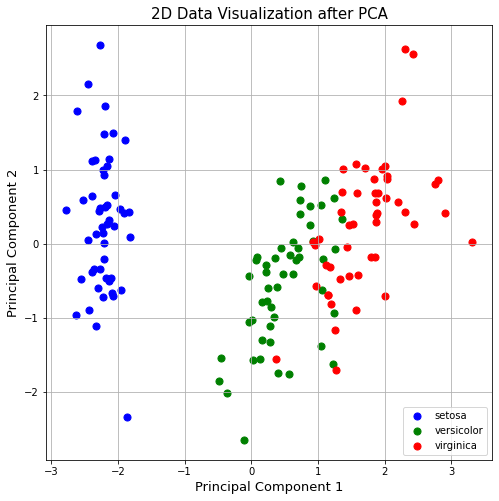

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 13)
ax.set_ylabel('Principal Component 2', fontsize = 13)
ax.set_title('2D Data Visualization after PCA', fontsize = 15)

targets=np.unique(iris.target)
colors = ['b', 'g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf["Iris Class"] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Principal component 1'],
               finaldf.loc[indicesToKeep, 'Principal component 2'],
               c = color,
               s = 50)
ax.legend(iris.target_names)
ax.grid()

**explained_variance_ratio_** : array, shape (n_components,)
Percentage of variance explained by each of the selected components.

If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

Print out the variance ratio.

In [19]:
pca.explained_variance_ratio_

array([0.72962433, 0.22850776], dtype=float32)

After PCA, Dimension of the dataset was reduced from four to two. Using **`pca.explained_variance_ratio`**, we can see how much variance of the total variance was retained. Higher percentages will mean that more information is retained.

0.7296+0.2285=0.9581.

**95.81%** of the information was retained.

Let us try with another dataset, this time we will use the famous Breast Cancer dataset.
We can load it directly from scikit-learn.

# Breast Cancer Data Visualization using PCA

In [20]:
bcancer=datasets.load_breast_cancer()

In [21]:
dir(bcancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

Let's check how many class do we have in this dataset.

In [22]:
bcancer.target_names

array(['malignant', 'benign'], dtype='<U9')

There are **two** target classes in the breast cancer dataset, Malignant and Benign.

**Malignant** means **"Harmful"** whereas **Benign** means **"Not Harmful"**.

In [23]:
bcancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
bcancer.data.shape

(569, 30)

In the breast cancer dataset, there are 30 features or columns of data.

There are 569 rows of sample data or entries.

In [25]:
data = bcancer.data.astype(np.float32)
target = bcancer.target.astype(np.float32)

In [26]:
np.unique(bcancer.target)

array([0, 1])

In [27]:
pd.DataFrame(data=data, columns=bcancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.379999,17.330000,184.600006,2019.000000,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.990000,23.410000,158.800003,1956.000000,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.570000,25.530001,152.500000,1709.000000,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.910000,26.500000,98.870003,567.700012,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.540001,16.670000,152.199997,1575.000000,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
scaled_data = StandardScaler().fit_transform(data)

In [29]:
pd.DataFrame(data=scaled_data, columns=bcancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283514,2.652874,2.532475,2.217515,2.255747,...,1.886689,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685954,1.908708,-0.826963,-0.487072,-0.023846,0.548144,0.001392,-0.868653,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052925,1.363479,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009561,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [30]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)
principaldf = pd.DataFrame(data=principalComponents,
                           columns=['Principal component 1', 'Principal component 2'])
principaldf.head()

,Principal component 1,Principal component 2
0,9.192834,1.948585
1,2.387804,-3.768175
2,5.733897,-1.075172
3,7.122946,10.275594
4,3.935303,-1.948071


In [31]:
targetdf = pd.DataFrame(data = bcancer.target
             , columns = ["Breast Cancer Class"])

In [32]:
finaldf = pd.concat([principaldf, targetdf], axis = 1)
finaldf.head()

,Principal component 1,Principal component 2,Breast Cancer Class
0,9.192834,1.948585,0
1,2.387804,-3.768175,0
2,5.733897,-1.075172,0
3,7.122946,10.275594,0
4,3.935303,-1.948071,0


Specify the "targets" to be the labels of the breast cancer dataset.

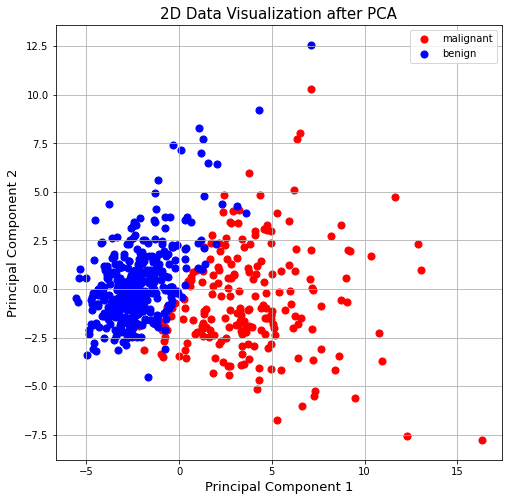

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 13)
ax.set_ylabel('Principal Component 2', fontsize = 13)
ax.set_title('2D Data Visualization after PCA', fontsize = 15)

targets=np.unique(bcancer.target)
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf["Breast Cancer Class"] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Principal component 1'],
               finaldf.loc[indicesToKeep, 'Principal component 2'],
               c = color,
               s = 50)
ax.legend(bcancer.target_names)
ax.grid()

In [34]:
pca.explained_variance_ratio_

array([0.44272014, 0.18971184], dtype=float32)

After PCA, Dimension of the dataset was reduced from **thirty to two**.<br><br>
The more the difference between the initial and final dimensions, it is inevitable that the information retained will be less.

0.4427+0.1897=0.6324.

**63.24%** of the information was retained.

Despite the information lost, we can still see that the two classes of Breast Cancer is **clearly separated** by using the provided dataset.